In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dist = np.random.normal(2,.5,1000) #mean, variance, no. of samples
dist_2 = np.random.normal(0,1,1000)
print(dist.shape)
print(dist_2.shape)
print(dist[:5,])

(1000,)
(1000,)
[1.37622853 1.73258167 1.27777086 1.95081487 3.04357149]


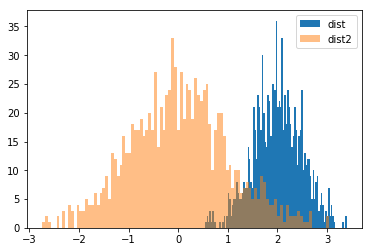

In [3]:
plt.hist(dist,100)
plt.hist(dist_2,100,alpha=0.5)
plt.legend(["dist","dist2"])
plt.show()

# Multivariate Case

In [4]:
monkeydata = np.random.multivariate_normal([1,2],[[1,0.5],[0.5,1]],1000)
chimpdata = np.random.multivariate_normal([4,4],[[1,0],[0,1]],1000)

print(monkeydata.shape)
print(chimpdata.shape)

(1000, 2)
(1000, 2)


In [5]:
print(monkeydata[:5,])

[[1.71074275 2.85389017]
 [0.7627958  1.3687741 ]
 [1.93873847 3.42528239]
 [1.02874909 2.15570002]
 [1.75071018 2.04011495]]


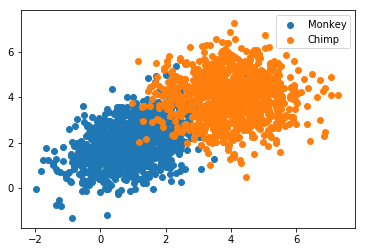

In [7]:
plt.scatter(monkeydata[:,0],monkeydata[:,1],label="Monkey")
plt.scatter(chimpdata[:,0],chimpdata[:,1],label="Chimp")
plt.legend()
plt.show()

# K-NN

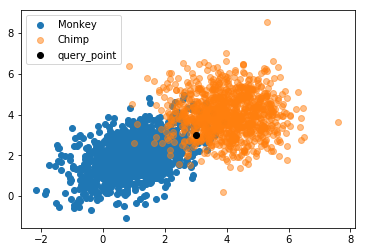

In [52]:
plt.scatter(monkeydata[:,0],monkeydata[:,1],label="Monkey")
plt.scatter(chimpdata[:,0],chimpdata[:,1],label="Chimp",alpha=.5)
query=np.array([3,3])
plt.scatter(query[0],query[1],c="black",label="query_point")
plt.legend()
plt.show()

In [53]:
data = np.zeros((2000,3))
# print(data[:5,])
data[:1000,:-1] = monkeydata
data[1000:,:-1] = chimpdata 
data[1000:,-1:] = 1
print(data.shape)
# print(data[:5,])


(2000, 3)


In [54]:
print(data)

[[ 0.55374901  2.01418885  0.        ]
 [ 0.23745563  2.98469464  0.        ]
 [-1.05470307  1.75912366  0.        ]
 ...
 [ 4.58176391  3.92961871  1.        ]
 [ 3.62035619  5.24358425  1.        ]
 [ 3.98566845  4.239241    1.        ]]


In [55]:
xtrain = data[:,:-1]
ytrain = data[:,-1]
print(xtrain.shape, ytrain.shape)
# print(xtrain.shape[0])
print(type(xtrain))

(2000, 2) (2000,)
<class 'numpy.ndarray'>


In [60]:
def distance(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())
def k_nn(xtrain,ytrain,query,k=5):
    #step 1
    distance_values = []
    
    m = xtrain.shape[0]
    for ix in range(m):
        d = distance(query,xtrain[ix])
        distance_values.append((d,ytrain[ix]))

    distance_values = sorted(distance_values)
#     print(distance_values)
    distance_values = distance_values[:k]
#     print(distance_values)
    y = np.array(distance_values)
    print(y)
    t = np.unique(y[:,1],return_counts=True)
    print(t)
    
    index = t[1].argmax()
    print(index)
    prediction = t[0][index]
    print(prediction)
    return prediction
    

In [61]:
k_nn(xtrain,ytrain,query)

[[0.01251622 1.        ]
 [0.01866474 1.        ]
 [0.0253573  1.        ]
 [0.05234216 1.        ]
 [0.05321224 0.        ]]
(array([0., 1.]), array([1, 4]))
1
1.0


1.0